### **Fitting on MIMIC-IV data**

In [1]:
import sys
sys.path.append('../')
sys.path.append('../nn_survival_analysis')
from nn_survival_analysis.general_utils import *
from nn_survival_analysis.model_utils import *
from nn_survival_analysis.losses import *
from nn_survival_analysis.models import *
from nn_survival_analysis.other_nn_models import *
from nn_survival_analysis.time_invariant_surv import *
from nn_survival_analysis.time_variant_surv import *
from nn_survival_analysis.traditional_models import *
import scipy

# define sigmoid function - will be handy later
sigmoid = lambda z : 1 / (1 + np.exp(-z))

config_file_path = '../nn_survival_analysis/config.json'

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


### Load Data for TIS

In [2]:
data_folder_path = '../data/'

# Get configs
with open(config_file_path, "r") as file:
        configs = json.load(file)

# Read the pickled DataFrames
with open(data_folder_path+'x_train.pickle', 'rb') as file:
    x_train = pickle.load(file)
with open(data_folder_path+'x_test.pickle', 'rb') as file:
    x_test = pickle.load(file)
with open(data_folder_path+'x_val.pickle', 'rb') as file:
    x_val = pickle.load(file)

### **Testing Time-Invariant Performance**

In [3]:
%%time
print(configs['time_invariant']['training'])
#-----------------------------------------------------------------------------------------------
# instantiate - Time Invariant Survival
tis = Time_Invariant_Survival(
        configs = configs, 
        train_data = x_train,
        test_data = x_test, 
        val_data = x_val
)

# fit
tis.fit(verbose = True)
mean_ , up_ , low_ , y_test_dur , y_test_event = tis.predict() # Visualize -> tis.visualize(mean_ , up_ , low_ , _from = 40 , _to = 50 )
tis_cindex , tis_ibs = tis.evaluation(mean_ , y_test_dur , y_test_event, plot = False)
print(tis_cindex , tis_ibs)

{'clusters': 1, 'q_cuts': 15, 'hidden_size': 25, 'alpha': 0.01, 'batch_size': 256, 'num_epochs': 400, 'learning_rate': 0.001, 'shuffle': True, 'patience': 20, 'dropout': 0.5}
training cluster 0
Epoch 50: Training Loss: 0.0003261, Val Loss: 0.0024800
Epoch 100: Training Loss: -0.0063467, Val Loss: -0.0015227
Epoch 150: Training Loss: -0.0030961, Val Loss: -0.0045511
Epoch 200: Training Loss: -0.0102889, Val Loss: -0.0071723
Epoch 250: Training Loss: -0.0168401, Val Loss: -0.0065745
Epoch 300: Training Loss: -0.0106703, Val Loss: -0.0081961
Epoch 350: Training Loss: -0.0195144, Val Loss: -0.0134945
Epoch 400: Training Loss: -0.0100805, Val Loss: -0.0106424
shapes : (1325, 1325, 1325, 1325)
0.6762912091728759 0.3398387265675083
CPU times: total: 4min 47s
Wall time: 56.3 s


### Load Data for TVS

In [4]:
data_folder_path = '../data/'

# Get configs
with open(config_file_path, "r") as file:
        configs = json.load(file)
        
# Read the pickled DataFrames
with open(data_folder_path+'x_train_reshape_tv.pickle', 'rb') as file:
    x_train_reshape_tv = pickle.load(file)
with open(data_folder_path+'x_test_reshape_tv.pickle', 'rb') as file:
    x_test_reshape_tv = pickle.load(file)
with open(data_folder_path+'x_val_reshape_tv.pickle', 'rb') as file:
    x_val_reshape_tv = pickle.load(file)

# Read the pickled targets
with open(data_folder_path+'y_train.pickle', 'rb') as file:
    y_train = pickle.load(file)
with open(data_folder_path+'y_test.pickle', 'rb') as file:
    y_test = pickle.load(file)
with open(data_folder_path+'y_val.pickle', 'rb') as file:
    y_val = pickle.load(file)

### **Testing Time-Variant Performance**

In [5]:
%%time
print(configs['time_variant']['training'])
#-----------------------------------------------------------------------------------------------
# instantiate - Time Variant Survival
tvs = Time_Variant_Survival(
            configs = configs, 
            x_train_reshape_tv = x_train_reshape_tv,
            x_test_reshape_tv = x_test_reshape_tv, 
            x_val_reshape_tv = x_val_reshape_tv,
            y_train = y_train,
            y_test = y_test,
            y_val = y_val
)

# fit
tvs.fit(verbose = True)
mean_ , up_ , low_ , y_test_dur , y_test_event = tvs.predict() # Visualize -> tis.visualize(mean_ , up_ , low_ , _from = 40 , _to = 50 )
tvs_cindex , tvs_ibs = tvs.evaluation(mean_ , y_test_dur , y_test_event, plot = False)
print(tvs_cindex , tvs_ibs)

# {'q_cuts': 10, 'hidden_size': 30, 'alpha': 0.001, 'batch_size': 64, 'num_epochs': 100, 'learning_rate': 0.001, 'shuffle': True, 'patience': 50, 'dropout': 0.5}
# shapes : (1180, 1180, 1180, 1180)
# 0.7208971317662282 0.35702184920448965
# CPU times: total: 16min 11s
# Wall time: 2min 22s

{'q_cuts': 15, 'hidden_size': 25, 'alpha': 0.01, 'batch_size': 256, 'num_epochs': 100, 'learning_rate': 0.001, 'shuffle': True, 'patience': 20, 'dropout': 0.5}
Epoch 50: Training Loss: -0.0118535, Val Loss: -0.0049243
Epoch 100: Training Loss: -0.0201020, Val Loss: -0.0105769
shapes : (1180, 1180, 1180, 1180)
0.7324360309393181 0.36280265504669457
CPU times: total: 9min 46s
Wall time: 1min 41s


#### Other Fitters

In [6]:
%%time
# #-----------------------------------------------------------------------------------------------
# # instantiate - PyCox
# pyc = PYC(configs = configs, train_data = x_train, test_data = x_test, val_data = x_val, num_durations = 10)

# # fit
# pyc.fit()

# # eval
# pyc_cindex , pyc_ibs = pyc.eval()
        
# print(f'PyCox: cindex {pyc_cindex} , ibs {pyc_ibs}')
# #-----------------------------------------------------------------------------------------------
# # instantiate - Deep Survival Machines
# dsm = DSM(configs = configs, train_data = x_train, test_data = x_test, val_data = x_val, num_durations = 10)

# # fit
# dsm.fit()

# # eval
# dsm_cindex , dsm_ibs = dsm.eval()
       
# print(f'Deep Survival Machines: cindex {dsm_cindex} , ibs {dsm_ibs}')

# # -----------------------------------------------------------------------------------------------
# # instantiate - CPH
# cph = CPH(configs = configs, train_data = x_train, test_data = x_test, val_data = x_val)

# # fit
# cph.fit()
# # eval
# cph_cindex , cph_ibs = cph.eval(fitter_is_rsf = False)
        
# print(f'Cox Proportional Hazards: cindex {cph_cindex} , ibs {cph_ibs}')

# #-----------------------------------------------------------------------------------------------
# # instantiate - AFT
# aft = AFT(configs = configs, train_data = x_train, test_data = x_test, val_data = x_val)

# # fit
# aft.fit()
# # eval
# aft_cindex , aft_ibs = aft.eval(fitter_is_rsf = False)
        
# print(f'Weibull Accelerated Failure Time: cindex {aft_cindex} , ibs {aft_ibs}')

# -----------------------------------------------------------------------------------------------
# instantiate - RSF
rsf = RSF(configs = configs, train_data = x_train, test_data = x_test, val_data = x_val)

# fit
rsf.fit()
# eval
rsf_cindex , rsf_ibs = rsf.eval(fitter_is_rsf = True)

print(f'Random Survival Forest: cindex {rsf_cindex} , ibs {rsf_ibs}')
# Random Survival Forest: cindex 0.739136799919481 , ibs 0.19508451442723854
# Random Survival Forest: cindex 0.7402393609720836 , ibs 0.19553789135704677
# Random Survival Forest: cindex 0.6891062256773199 , ibs 0.18540551797869104

shapes : (1325, 1325, 1325, 1325)
Random Survival Forest: cindex 0.6891062256773199 , ibs 0.18540551797869104
CPU times: total: 41.5 s
Wall time: 18.1 s


### **Explanation for TIS**

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Expected value -7.708798885345459
Subject value -6.802929878234863


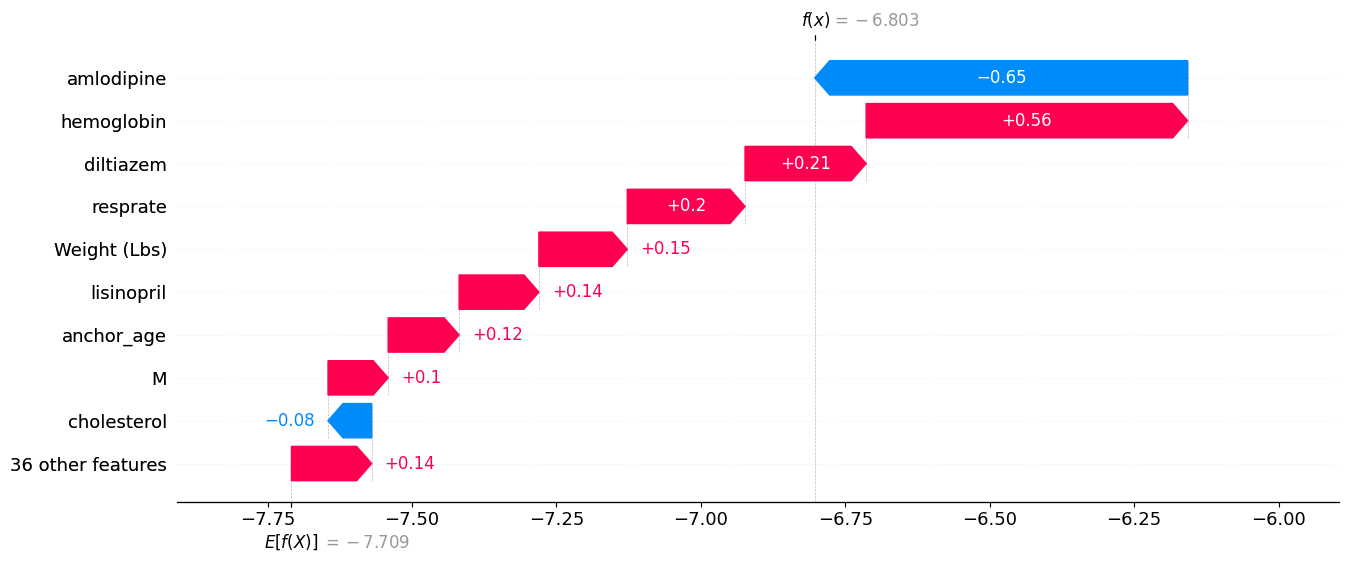

In [ ]:
# what caused the model predictions to deviate for the 50th patient at the 10th time stamp?
t_s , pat_num = 0 , 50
tis.explain_with_shap(background_size = 500 , explained_size = 100)
tis.plot_explain(plot_type = 'waterfall' , t_s = t_s , pat_num = pat_num)

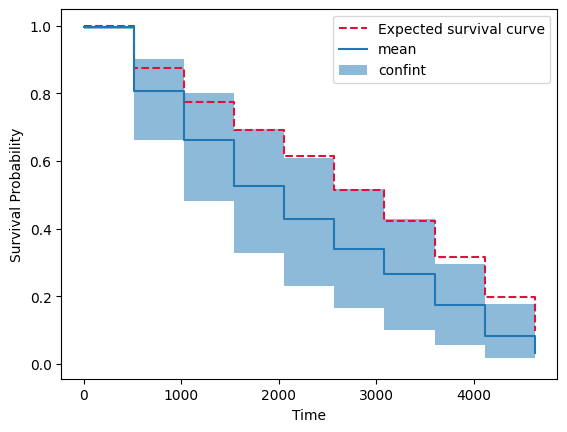

In [ ]:
# get death time and event indicator
y_test_dur_ , y_test_event_ = get_target(x_test)

t_test = Transforms(durations = y_test_dur_)
dur_idx_test = t_test.discrete_transform(_cuts = configs['time_invariant']['training']['q_cuts'])

# Expected survival curve
plt.step(
    t_test.bin_edges , np.cumprod(1 - sigmoid(tis.shap_utils[0].expected_value)) , 
    where = 'post' , color = 'crimson' , ls = '--' ,
    label = 'Expected survival curve'
    )

mean_ , up_ , low_ , y_test_dur , y_test_event = tis.predict()

# Visualize
tis.visualize(mean_ , up_ , low_ , _from = pat_num , _to = None)
plt.legend()
plt.savefig('diff_exp_curve.pdf' , format = 'pdf')
plt.show()

### **Trying to compare survival curves**

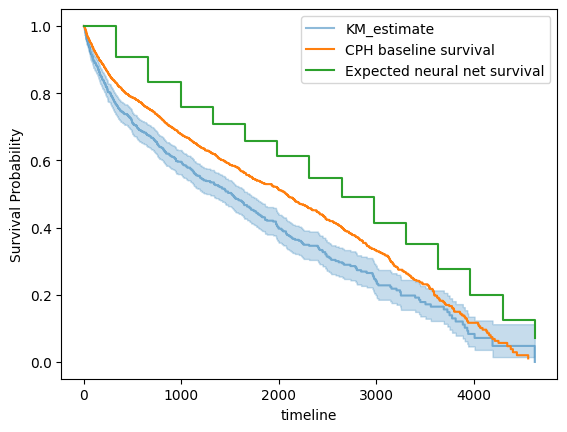

In [ ]:
fig , ax = plt.subplots()

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

T = x_test["time_to_event"]
E = x_test["death"]

kmf.fit(T, event_observed=E)
kmf.plot_survival_function(alpha = 0.5);

# CPH
ax.step((cph.fitter.baseline_survival_).index , (cph.fitter.baseline_survival_)['baseline survival'] , where = 'post' , label = 'CPH baseline survival')

# Expected survival curve
ax.step(t_test.bin_edges , np.cumprod(1 - sigmoid(tis.shap_utils[0].expected_value)) , where = 'post' , label = 'Expected neural net survival')
ax.legend()
ax.set_ylabel('Survival Probability');

plt.savefig('comparing_surv_curve.pdf' , format = 'pdf')
plt.show()

#### **Testing Statistical similarity**

In [ ]:
print(f"KM-NN {scipy.stats.kstest((kmf.survival_function_)['KM_estimate'] , np.cumprod(1 - sigmoid(tis.shap_utils[0].expected_value)) )}")
print(f"CPH-NN {scipy.stats.kstest((cph.fitter.baseline_survival_)['baseline survival']  , np.cumprod(1 - sigmoid(tis.shap_utils[0].expected_value)) )}")
print(f"KM-CPH {scipy.stats.kstest((cph.fitter.baseline_survival_)['baseline survival']  , (kmf.survival_function_)['KM_estimate'] )}")

KM-NN KstestResult(statistic=0.39785809906291836, pvalue=0.013060194154724557, statistic_location=0.4858417809009552, statistic_sign=-1)
CPH-NN KstestResult(statistic=0.29834368530020705, pvalue=0.11435593059886633, statistic_location=0.3472793698310852, statistic_sign=-1)
KM-CPH KstestResult(statistic=0.11547722983029426, pvalue=2.1759878733202745e-06, statistic_location=0.4298713460495861, statistic_sign=1)
